# **TRABAJO SERIES DE TIEMPO - ESTADÍSTICA NO PARAMÉTRICA - TEORÍA DE LA DECISIÓN - DISEÑO DE EXPERIMENTOS**



## Preparación de los datos

In [1]:
install.packages('forecast')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
library(readr)

In [4]:
covid_19 <- read_csv("https://www.dropbox.com/s/u8qatnxiktj24vk/Casos_positivos_de_COVID-19_en_Colombia.csv?dl=1")

Parsed with column specification:
cols(
  .default = col_character(),
  `ID de caso` = col_double(),
  `Fecha de notificación` = col_datetime(format = ""),
  Edad = col_double(),
  `Fecha de muerte` = col_datetime(format = ""),
  `Fecha diagnostico` = col_datetime(format = ""),
  `Fecha recuperado` = col_datetime(format = ""),
  `fecha reporte web` = col_datetime(format = ""),
  `Codigo departamento` = col_double(),
  `Codigo pais` = col_double()
)

See spec(...) for full column specifications.



In [5]:
head(covid_19)

ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,⋯,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,⋯,2020-02-27T00:00:00.000,NA,2020-03-06,2020-03-13,2020-03-06,PCR,11,380,Otro,NA
2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,⋯,2020-03-04T00:00:00.000,NA,2020-03-09,2020-03-19,2020-03-09,PCR,76,724,Otro,NA
3,2020-03-07,05001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,⋯,2020-02-29T00:00:00.000,NA,2020-03-09,2020-03-15,2020-03-09,PCR,5,724,Otro,NA
4,2020-03-09,05001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,⋯,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA
5,2020-03-09,05001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,⋯,2020-03-08T00:00:00.000,NA,2020-03-11,2020-03-23,2020-03-11,PCR,5,NA,Otro,NA
6,2020-03-10,05360,Itagüí,Antioquia,Recuperado,27,F,Relacionado,Leve,⋯,2020-03-06T00:00:00.000,NA,2020-03-11,2020-03-26,2020-03-11,PCR,5,NA,Otro,NA


In [6]:
dim(covid_19)

[1] 551696     21

In [7]:
summary(covid_19)

   ID de caso     Fecha de notificación         Código DIVIPOLA   
 Min.   :     1   Min.   :2020-03-02 00:00:00   Length:551696     
 1st Qu.:137965   1st Qu.:2020-07-01 00:00:00   Class :character  
 Median :275888   Median :2020-07-19 00:00:00   Mode  :character  
 Mean   :275888   Mean   :2020-07-14 01:25:01                     
 3rd Qu.:413812   3rd Qu.:2020-08-03 00:00:00                     
 Max.   :551736   Max.   :2020-08-24 00:00:00                     
                                                                  
 Ciudad de ubicación Departamento o Distrito   atención        
 Length:551696       Length:551696           Length:551696     
 Class :character    Class :character        Class :character  
 Mode  :character    Mode  :character        Mode  :character  
                                                               
                                                               
                                                               
                

**Transformamos las características 'Fecha diagnostico', 'Fecha de notificación' y 'fecha reporte web' a tipo date para poder realizar el análisis de las series de tiempo**

In [8]:
covid_19 <- covid_19[is.na(covid_19$`Fecha diagnostico`)==FALSE,]

In [9]:
covid_19$`Fecha diagnostico` <- as.Date(covid_19$`Fecha diagnostico`)
covid_19$`Fecha de notificación` <- as.Date(covid_19$`Fecha de notificación`)
covid_19$`fecha reporte web` <- as.Date(covid_19$`fecha reporte web`)

Creamos un dataframe para cada tipo de fecha, este dataset tendrá en una de sus columnas las diferentes fechas que se presentan y en la otra columna la frecuencia con la cual se presentan dichas fechas 

In [10]:
casos_FD <- with(covid_19[covid_19$`Fecha diagnostico`<='2020-08-22',],data.frame(table(`Fecha diagnostico`)))
casos_FN <- with(covid_19[covid_19$`Fecha de notificación`<='2020-08-22',],data.frame(table(`Fecha de notificación`)))
casos_FW <- with(covid_19[covid_19$`fecha reporte web`<='2020-08-22',],data.frame(table(`fecha reporte web`)))

## Vista gráficas

#### **Fecha de diagnóstico**

In [11]:
head(casos_FD)

,Fecha.diagnostico,Freq
,<fct>,<int>
1,2020-03-06,1
2,2020-03-09,2
3,2020-03-11,6
4,2020-03-12,5
5,2020-03-13,5
6,2020-03-14,18


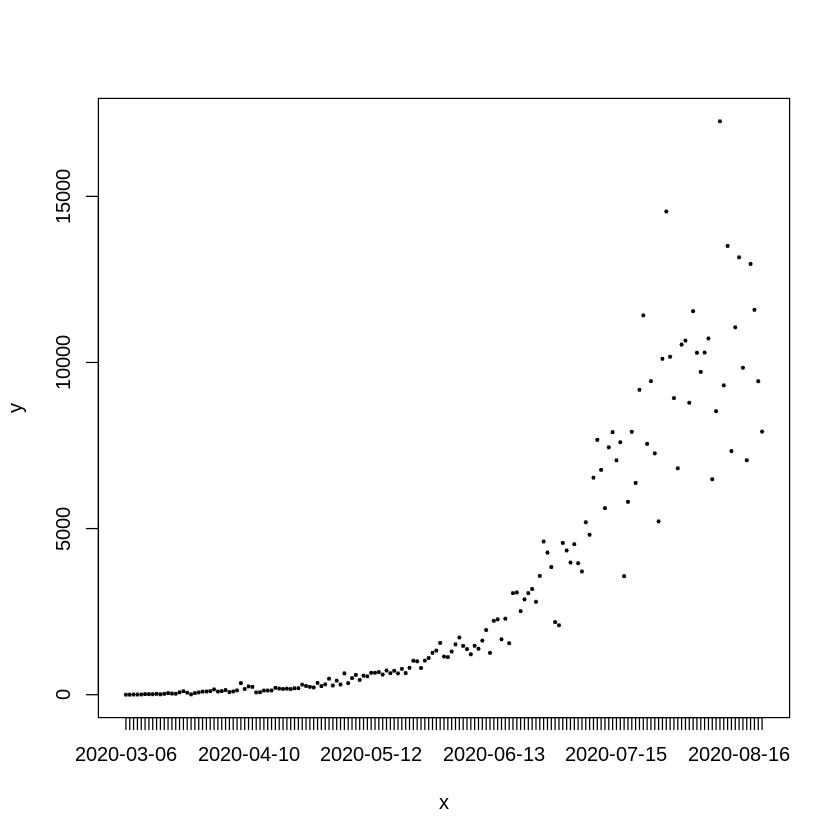

In [12]:
with(casos_FD, plot(Fecha.diagnostico, Freq))

 Analizando la gráfica anterior podemos decir que la frecuencia con la cúal se diagnostican pacientes con covid-19 ha ido en aumento 

También se ve que posiblemente está en aumento el contenido de aleatoriedad en la serie, sin embargo confirmaremos más adelante esto en la descomposición.

#### **Fecha de notificación**

In [13]:
head(casos_FN)

,Fecha.de.notificación,Freq
,<fct>,<int>
1,2020-03-02,1
2,2020-03-06,1
3,2020-03-07,1
4,2020-03-08,2
5,2020-03-09,3
6,2020-03-10,4


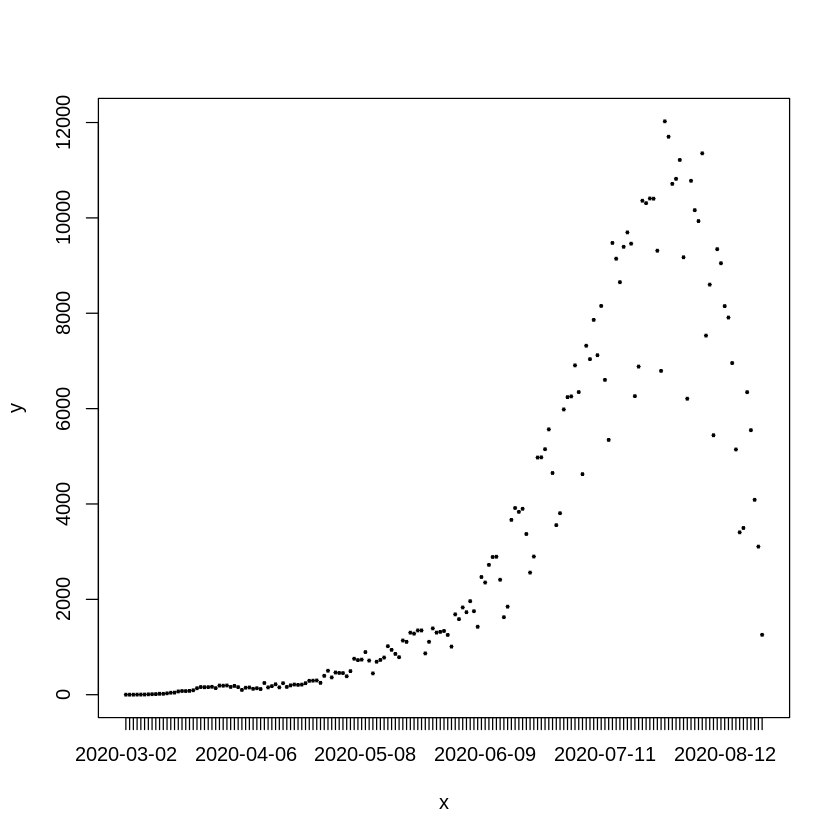

In [14]:
with(casos_FN, plot(Fecha.de.notificación, Freq))

Viendo la gráfica anterior, podemos decir que en algún momento se llegó a un punto donde se notificaron los casos con mayor frecuencia, sin embargo, vemos que hay un decenso, es decir, los casos se notifican con menos frecuencia en los últimos dias

#### **Fecha de reporte web**

In [15]:
head(casos_FW)

,fecha.reporte.web,Freq
,<fct>,<int>
1,2020-03-06,1
2,2020-03-09,2
3,2020-03-11,6
4,2020-03-12,5
5,2020-03-13,5
6,2020-03-14,18


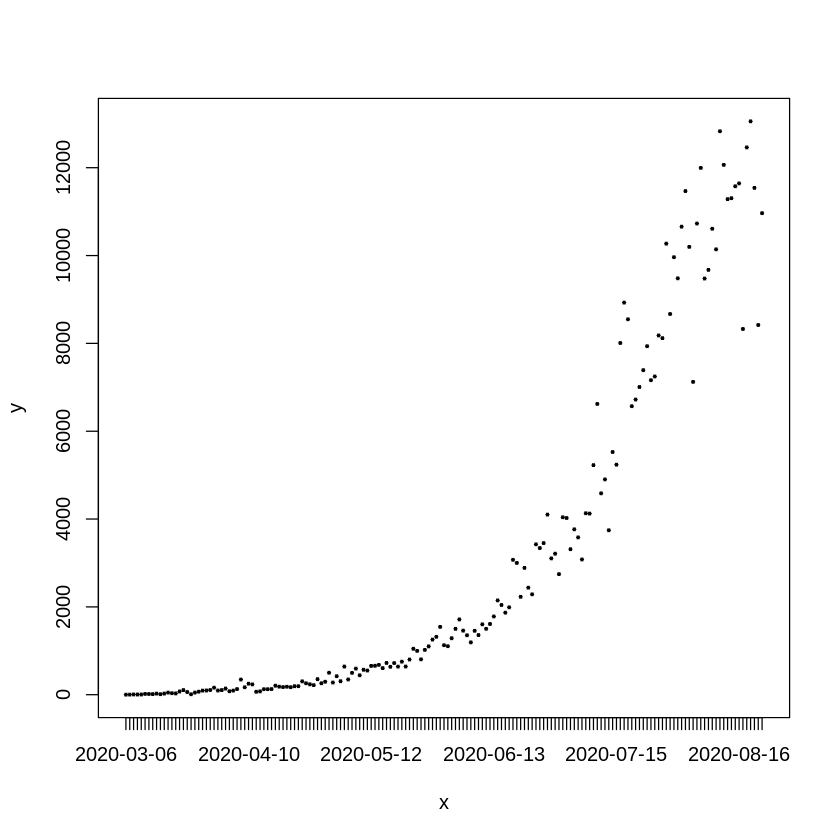

In [16]:
with(casos_FW, plot(fecha.reporte.web, Freq))

Analizando la gráfica para los reportes en la web, podemos identificar que la frecuencia ha ido aumentando a traves del tiempo, al igual que los diagnosticos sin embargo en menor medida

Por otra parte, observamos un componente aleatorio menos pronunciado

## Descomposición de las series de tiempo

A continuación procedemos a realizar la descomposición de las series de tiempos para las 3 columnas <br>
Fecha diagnostico<br>
Fecha de notificación<br>
fecha reporte web<br>

In [17]:
casosFD <- casos_FD$Freq
casosFN <- casos_FN$Freq
casosFW <- casos_FW$Freq

### Descomposición de las series indicando una estacionalidad de 7 días

In [18]:
casosFD.ts1<-ts(casosFD[-1], frequency = 7)
casosFN.ts1<-ts(casosFN[-1], frequency = 7)
casosFW.ts1<-ts(casosFW[-1], frequency = 7)

#### **Fecha de diagnóstico**

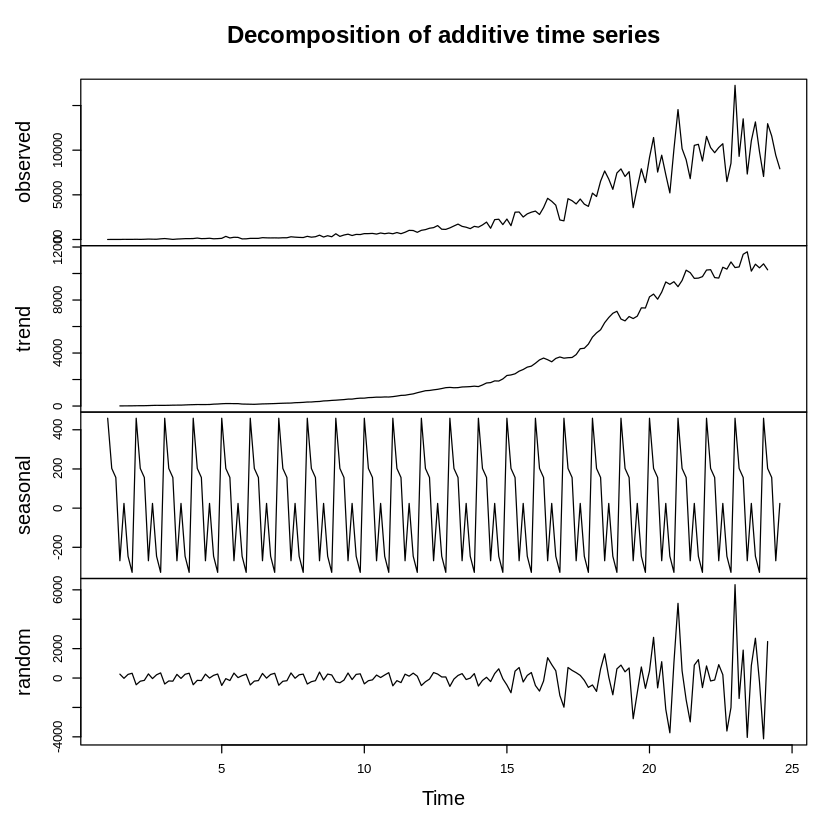

In [19]:
plot(decompose(casosFD.ts1))

Es de resaltar que esta descompósición confirma nuestra suposición en la cual observamos que el componente aleatorio de la serie incrementa con el pasar de elos días en la **Fecha de diagnóstico**

También notar que este error **está en un rango de -4000 a 6000**

#### **Fecha de notificación**

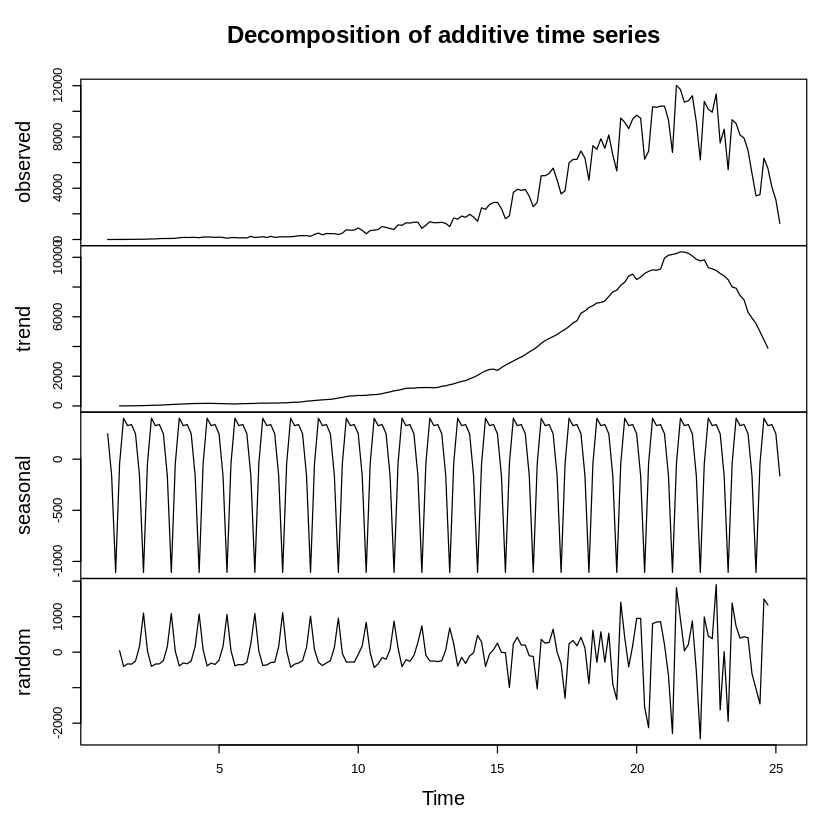

In [20]:
plot(decompose(casosFN.ts1))

#### **Fecha de reporte web**

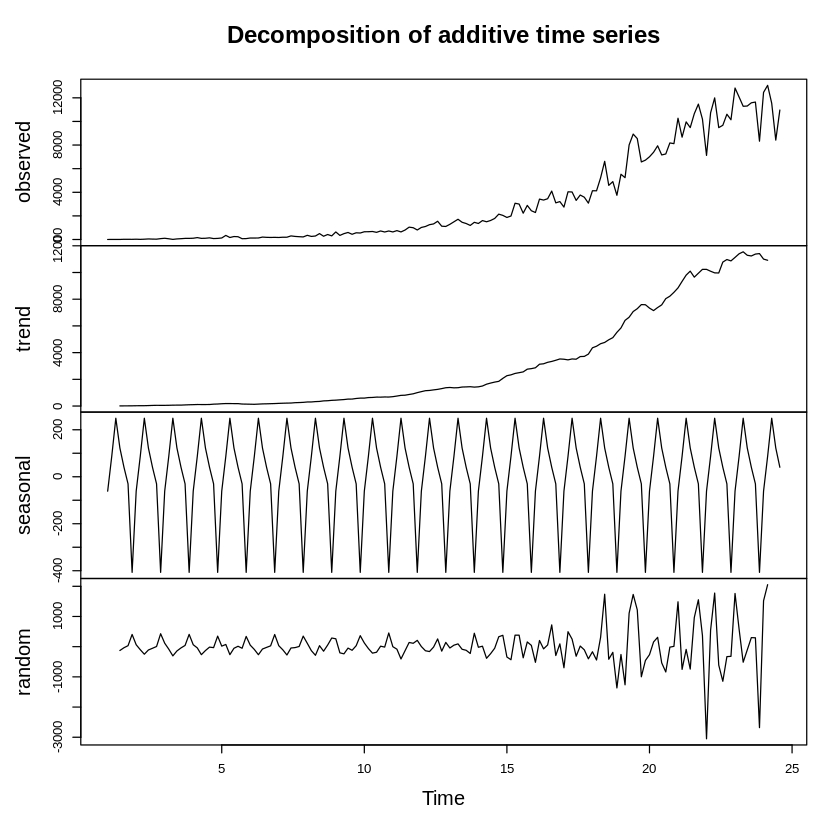

In [21]:
plot(decompose(casosFW.ts1))

Es de resaltar que en esta descompósición el componente aleatorio parece tener el mismo comportamiento en la mayoría de la serie sin embargo crece en los últimos días
También notar que este error **está en un rango de -3000 a 1000** 

### Descomposición de las series **sin indicar estacionalidad**

In [22]:
casosFD.ts2<-ts(casosFD[-1])
casosFN.ts2<-ts(casosFN[-1])
casosFW.ts2<-ts(casosFW[-1])

Aplicamos diferencia a los datos para conseguir la estacionalidad de las series a las cuales no la especificamos


In [23]:
s.diff.FD.ts2 <- diff(casosFD.ts2)
s.diff.FN.ts2 <- diff(casosFN.ts2)
s.diff.FW.ts2 <- diff(casosFW.ts2)

Creamos las gráficas para observar la función de autocorrelación y la función de autocorrelación parcial

#### **Función de autocorrelación y función de autocorrelación parcial para la Fecha de diagnostico**

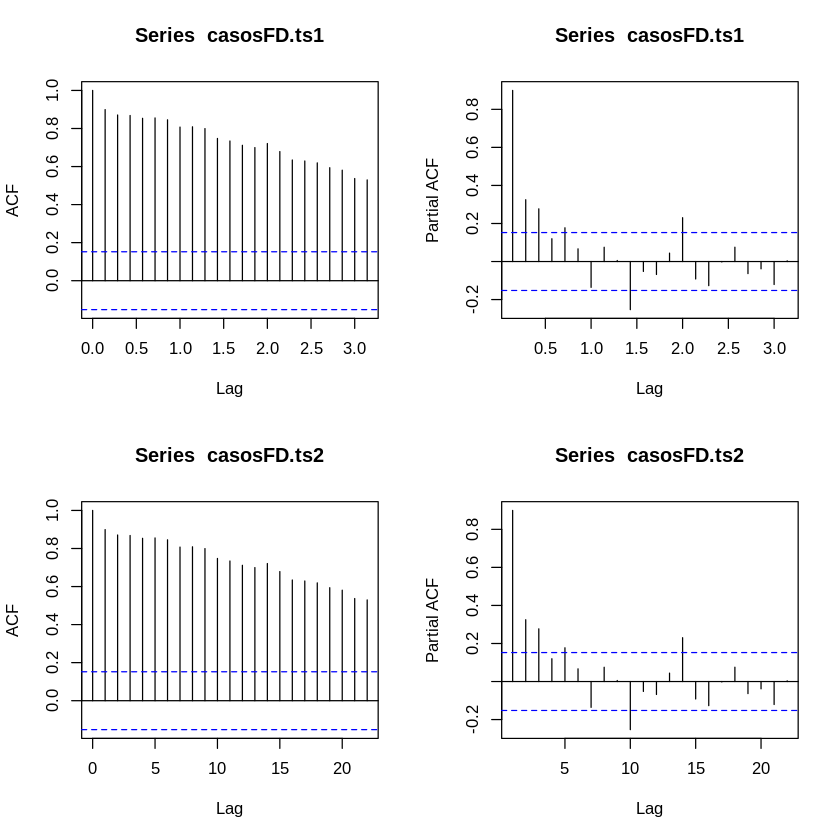

In [24]:
par(mfrow=c(2,2))
acf(casosFD.ts1)
pacf(casosFD.ts1)
acf(casosFD.ts2)
pacf(casosFD.ts2)

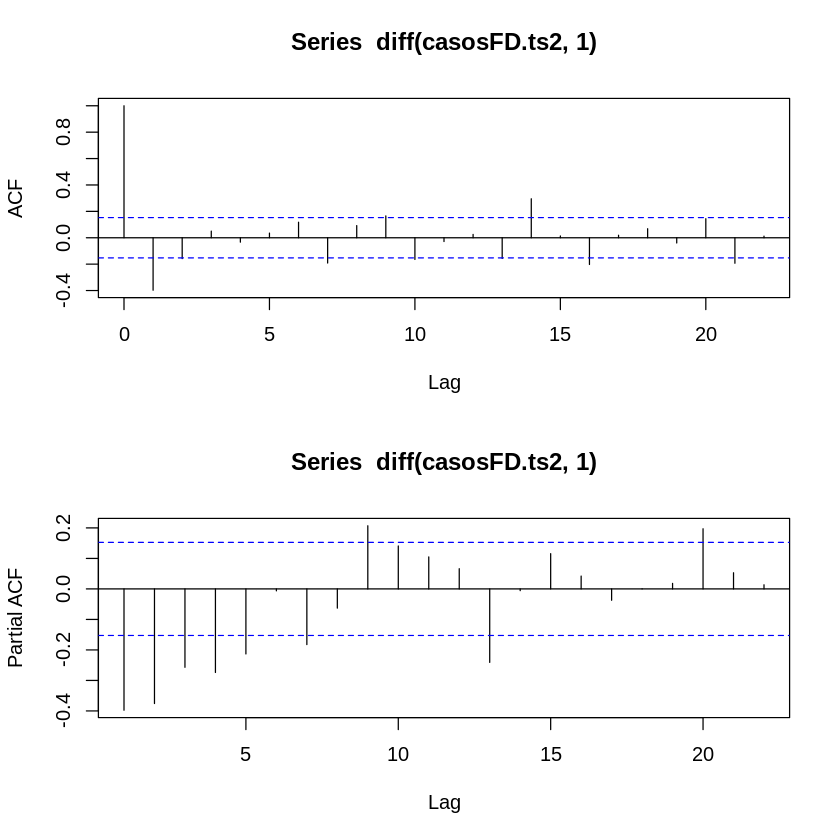

In [25]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(diff(casosFD.ts2,1))
pacf(diff(casosFD.ts2,1))

Observamos un suave descenso en la función de autocorrelación y por esto posiblemente sea un proceso arima
Sin embargo, para la función de autocorrelación parcial no identificamos un proceso claro

#### **Función de autocorrelación y función de autocorrelación parcial para la Fecha de notificación**

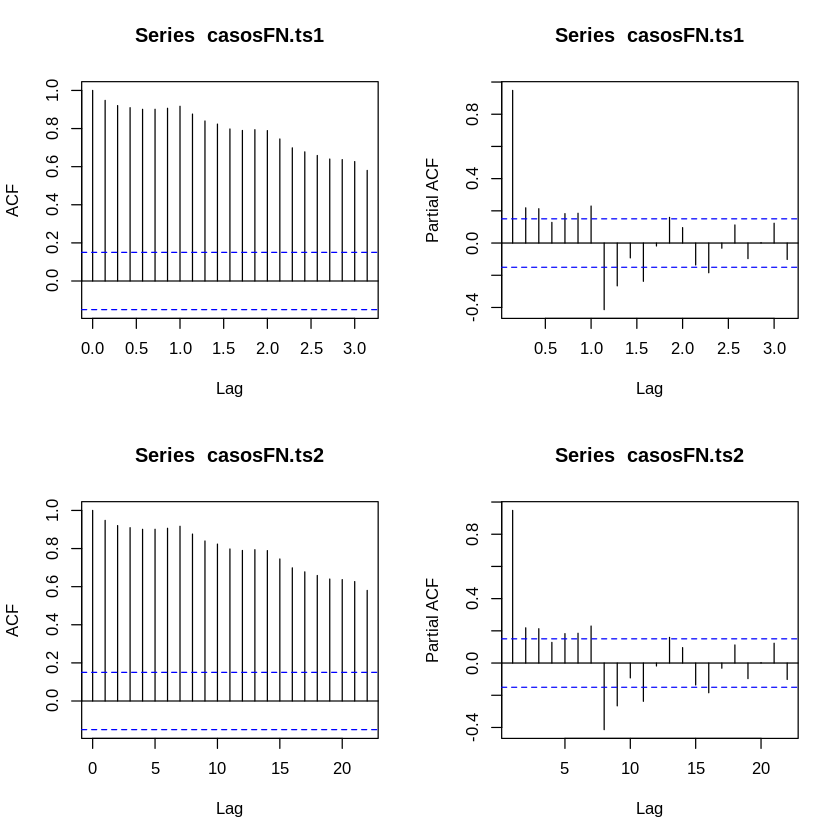

In [26]:
par(mfrow=c(2,2))
acf(casosFN.ts1)
pacf(casosFN.ts1)
acf(casosFN.ts2)
pacf(casosFN.ts2)


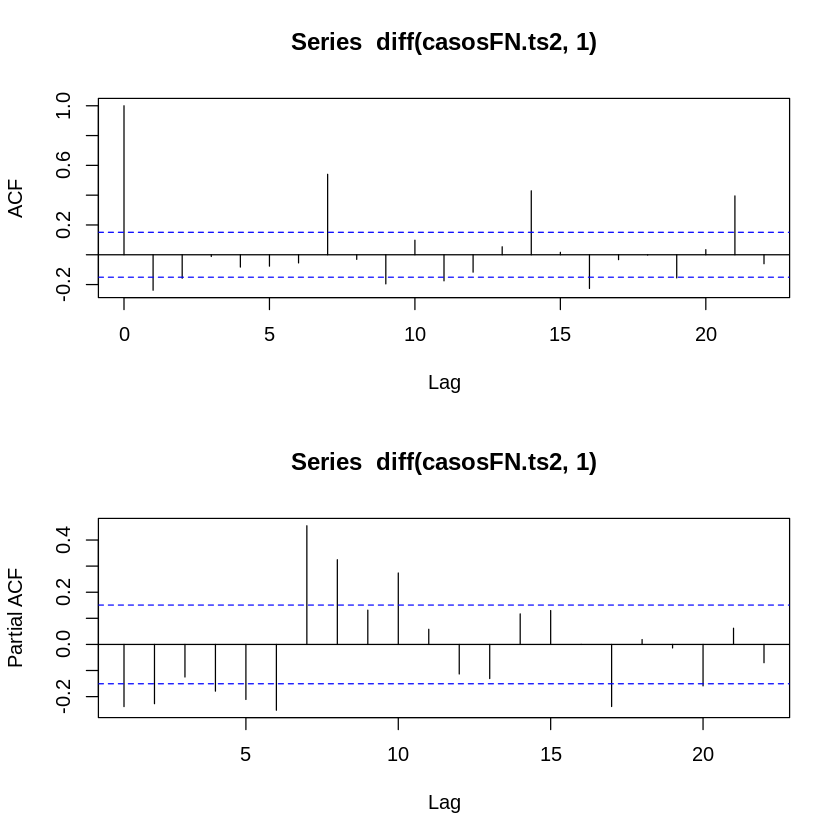

In [27]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(diff(casosFN.ts2,1))
pacf(diff(casosFN.ts2,1))

Observamos un suave descenso en la función de autocorrelación y por esto posiblemente sea un proceso arima
Sin embargo, para la función de autocorrelación parcial no identificamos un proceso claro

#### **Función de autocorrelación y función de autocorrelación parcial para la Fecha de reporte web**

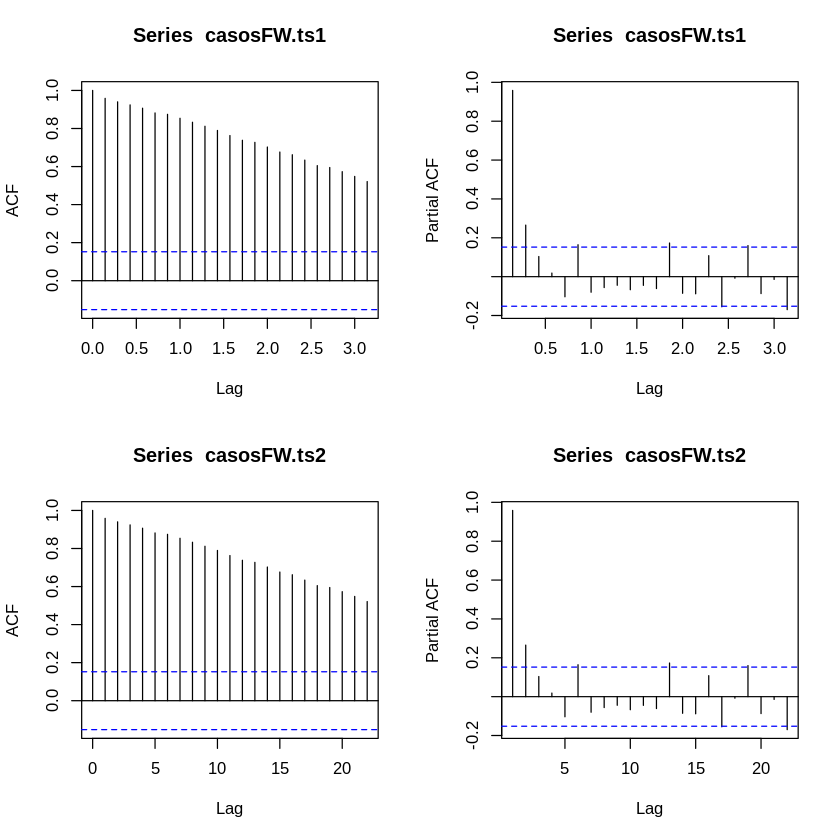

In [28]:
par(mfrow=c(2,2))
acf(casosFW.ts1)
pacf(casosFW.ts1)
acf(casosFW.ts2)
pacf(casosFW.ts2)

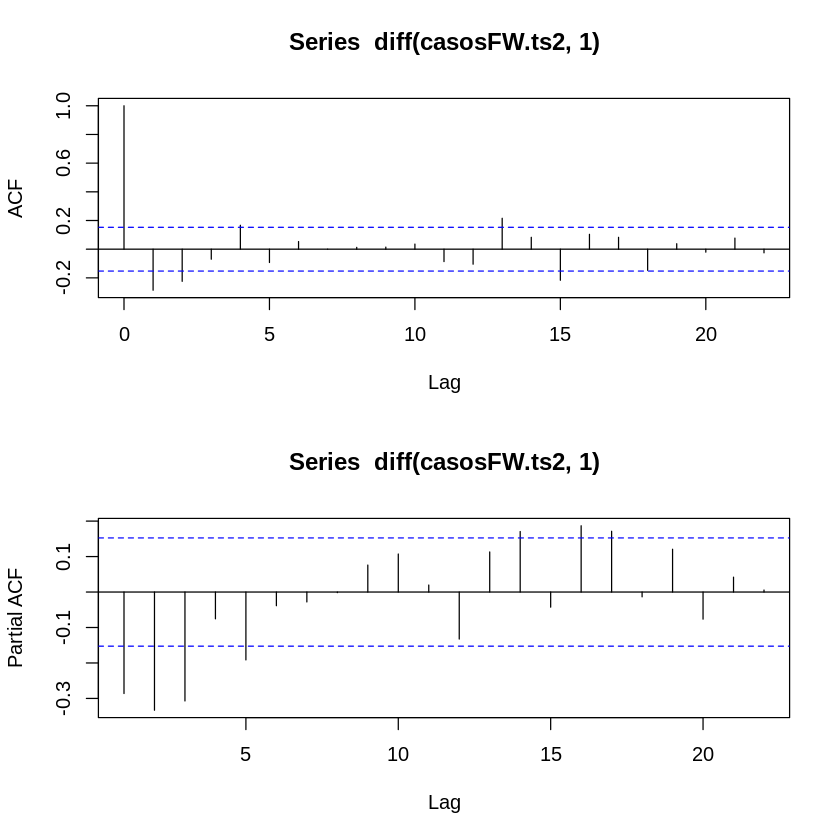

In [29]:
#Gráficas de autocorrelación y función de autocorrelación parcial para la serie a la cual se le aplicó diff
par(mfrow = c(2,1))
acf(diff(casosFW.ts2,1))
pacf(diff(casosFW.ts2,1))

Observamos un suave descenso en la función de autocorrelación y por esto posiblemente sea un proceso arima
Sin embargo, para la función de autocorrelación parcial no identificamos un proceso claro

## Obtenemos una aproximación del modelo usando la función `auto.arima`

#### **Fecha de diagnóstico**

In [30]:
casosFD

[1]     1     2     6     5     5    18    16    14    25    12    26    48
 [13]    34    29    73   105    61    10    49    69    94    96   107   160
 [25]    96   107   139    79    98   129   349   172   250   235    67    75
 [37]   126   125   128   205   184   174   182   171   194   195   304   262
 [49]   236   218   355   260   310   482   277   422   307   642   348   500
 [61]   595   445   571   553   659   659   681   606   727   647   719   641
 [73]   778   650   810  1022  1005   804  1027  1105  1260  1328  1557  1149
 [85]  1133  1299  1515  1723  1470  1373  1216  1472  1383  1628  1948  1259
 [97]  2224  2268  1668  2288  1550  3057  3078  2515  2870  3057  3181  2797
[109]  3575  4611  4278  3842  2186  2089  4568  4341  3978  4530  3958  3709
[121]  5189  4815  6533  7671  6768  5615  7446  7903  7054  7598  3567  5804
[133]  7913  6373  9177 11416  7551  9438  7263  5217 10110 14545 10173  8929
[145]  6814 10539 10658  8788 11544 10292  9717 10299 10723  6485  8533 17258
[157]  9310 13507  7332 11057 13164  9841  7056 12966 11585  9435  7919

In [31]:
casosFD_e <- auto.arima(casosFD.ts1)
casosFD_e

Series: casosFD.ts1 
ARIMA(0,1,1)(1,0,2)[7] with drift 

Coefficients:
          ma1     sar1    sma1    sma2    drift
      -0.8195  -0.6863  0.7622  0.5845  62.1007
s.e.   0.0389   0.0989  0.0954  0.0757  22.5718

sigma^2 estimated as 1340552:  log likelihood=-1400.14
AIC=2812.28   AICc=2812.81   BIC=2830.91

Analizando los resultados obtenidos por la función auto.arima, y sabiendo que el orden es 7, podemos decir que los resultados del presente día estan influenciados por lo que se observó hace 7 días, estos valores influyen en un 58%


In [32]:
casosFD_se <- auto.arima(casosFD.ts2)
casosFD_se

Series: casosFD.ts2 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.8135  64.2166
s.e.   0.0348  20.1259

sigma^2 estimated as 1835118:  log likelihood=-1423.53
AIC=2853.05   AICc=2853.2   BIC=2862.37

Analizando los resultados obtenidos por la función auto.arima, podemos decir que sigue un modelo de media móvil


In [33]:
ms1_FD <- auto.arima(s.diff.FD.ts2) #(0,0,1)
ms2_FD <- arima(s.diff.FD.ts2, order = c(2,0,1))
ms3_FD <- arima(s.diff.FD.ts2, order = c(2,0,2))
ms4_FD <- arima(s.diff.FD.ts2, order = c(1,0,1))
ms5_FD <- arima(s.diff.FD.ts2, order = c(1,0,2))
ms1_FD

Series: s.diff.FD.ts2 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -0.8135  64.2166
s.e.   0.0348  20.1259

sigma^2 estimated as 1835118:  log likelihood=-1423.53
AIC=2853.05   AICc=2853.2   BIC=2862.37

In [34]:
AIC(casosFD_e, casosFD_se, ms1_FD,ms2_FD,ms3_FD,ms4_FD,ms5_FD)
BIC(casosFD_e, casosFD_se, ms1_FD,ms2_FD,ms3_FD,ms4_FD,ms5_FD)

,df,AIC
,<dbl>,<dbl>
casosFD_e,6,2812.277
casosFD_se,3,2853.054
ms1_FD,3,2853.054
ms2_FD,5,2849.414
ms3_FD,6,2833.791
ms4_FD,4,2855.053
ms5_FD,5,2856.013


,df,BIC
,<dbl>,<dbl>
casosFD_e,6,2830.913
casosFD_se,3,2862.372
ms1_FD,3,2862.372
ms2_FD,5,2864.943
ms3_FD,6,2852.427
ms4_FD,4,2867.477
ms5_FD,5,2871.543


_____________________________________________________________________

#### **Fecha de notificación**

In [35]:
casosFN_e <- auto.arima(casosFN.ts1)
casosFN_e

Series: casosFN.ts1 
ARIMA(0,1,3)(0,1,2)[7] 

Coefficients:
          ma1     ma2     ma3     sma1    sma2
      -0.7353  0.0545  0.1565  -0.5651  0.1411
s.e.   0.0835  0.1015  0.0779   0.0973  0.1006

sigma^2 estimated as 560678:  log likelihood=-1300.96
AIC=2613.91   AICc=2614.46   BIC=2632.44

In [36]:
predict(auto.arima(casosFN.ts1),5)

$pred
Time Series:
Start = c(25, 3) 
End = c(25, 7) 
Frequency = 7 
[1] -557.3719 1781.9283 2606.2386 1842.4233 1339.0950

$se
Time Series:
Start = c(25, 3) 
End = c(25, 7) 
Frequency = 7 
[1] 748.7842 774.5718 810.6119 885.4195 954.3814

In [37]:
casosFN_se <- auto.arima(casosFN.ts2)
casosFN_se

Series: casosFN.ts2 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      1.0681  -0.6893  -1.5236  0.8533
s.e.  0.0689   0.0800   0.0482  0.0467

sigma^2 estimated as 904547:  log likelihood=-1397.63
AIC=2805.27   AICc=2805.64   BIC=2820.92

In [38]:
ms1_FN <- auto.arima(s.diff.FN.ts2) #(2,0,2)
ms2_FN <- arima(s.diff.FN.ts2, order = c(2,0,1))
ms3_FN <- arima(s.diff.FN.ts2, order = c(2,0,2))
ms4_FN <- arima(s.diff.FN.ts2, order = c(1,0,1))
ms5_FN <- arima(s.diff.FN.ts2, order = c(1,0,2))
ms1_FN

Series: s.diff.FN.ts2 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.0681  -0.6893  -1.5236  0.8533
s.e.  0.0689   0.0800   0.0482  0.0467

sigma^2 estimated as 904547:  log likelihood=-1397.63
AIC=2805.27   AICc=2805.64   BIC=2820.92

In [39]:
AIC(casosFN_e, casosFN_se,ms1_FN,ms2_FN,ms3_FN,ms4_FN,ms5_FN)
BIC(casosFN_e, casosFN_se,ms1_FN,ms2_FN,ms3_FN,ms4_FN,ms5_FN)

Warning message in AIC.default(casosFN_e, casosFN_se, ms1_FN, ms2_FN, ms3_FN, ms4_FN, :
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
casosFN_e,6,2613.913
casosFN_se,5,2805.269
ms1_FN,5,2805.269
ms2_FN,5,2835.307
ms3_FN,6,2807.098
ms4_FN,4,2836.075
ms5_FN,5,2836.009


Warning message in BIC.default(casosFN_e, casosFN_se, ms1_FN, ms2_FN, ms3_FN, ms4_FN, :
“models are not all fitted to the same number of observations”


,df,BIC
,<dbl>,<dbl>
casosFN_e,6,2632.439
casosFN_se,5,2820.918
ms1_FN,5,2820.918
ms2_FN,5,2850.957
ms3_FN,6,2825.878
ms4_FN,4,2848.595
ms5_FN,5,2851.658


____________________________________________________________________________

#### **Fecha de reporte web**

In [40]:
casosFW_e <- auto.arima(casosFW.ts1)
casosFW_e

Series: casosFW.ts1 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

In [41]:
casosFW_se <- auto.arima(casosFW.ts2)
casosFW_se

Series: casosFW.ts2 
ARIMA(2,1,1) with drift 

Coefficients:
         ar1      ar2      ma1   drift
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

In [42]:
ms1_FW <-auto.arima(s.diff.FW.ts2) #(2,0,1)
ms2_FW <- arima(s.diff.FW.ts2, order = c(2,0,2))
ms3_FW <- arima(s.diff.FW.ts2, order = c(1,0,1))
ms4_FW <- arima(s.diff.FW.ts2, order = c(1,0,2))
ms1_FW

Series: s.diff.FW.ts2 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1    mean
      0.1178  -0.2502  -0.6358  67.919
s.e.  0.1041   0.0904   0.0827  19.661

sigma^2 estimated as 614713:  log likelihood=-1332.09
AIC=2674.18   AICc=2674.56   BIC=2689.71

In [43]:
AIC(casosFW_e, casosFW_se,ms1_FW,ms2_FW,ms3_FW,ms4_FW)
BIC(casosFW_e, casosFW_se,ms1_FW,ms2_FW,ms3_FW,ms4_FW)

,df,AIC
,<dbl>,<dbl>
casosFW_e,5,2674.178
casosFW_se,5,2674.178
ms1_FW,5,2674.178
ms2_FW,6,2674.172
ms3_FW,4,2679.173
ms4_FW,5,2678.659


,df,BIC
,<dbl>,<dbl>
casosFW_e,5,2689.708
casosFW_se,5,2689.708
ms1_FW,5,2689.708
ms2_FW,6,2692.808
ms3_FW,4,2691.597
ms4_FW,5,2694.189


_____________________________________________________________________



## Realizamos una pronóstico en los 3 modelos


#### **Fecha de diagnóstico**

In [44]:
forecast(casosFD,6)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
168       10283.70 5935.912 14631.49 3634.332 16933.07
169       10238.45 5805.616 14671.29 3459.012 17017.90
170       10193.21 5655.444 14730.98 3253.296 17133.12
171       10147.97 5484.651 14811.28 3016.042 17279.89
172       10102.72 5292.806 14912.64 2746.591 17458.85
173       10057.48 5079.763 15035.19 2444.721 17670.23

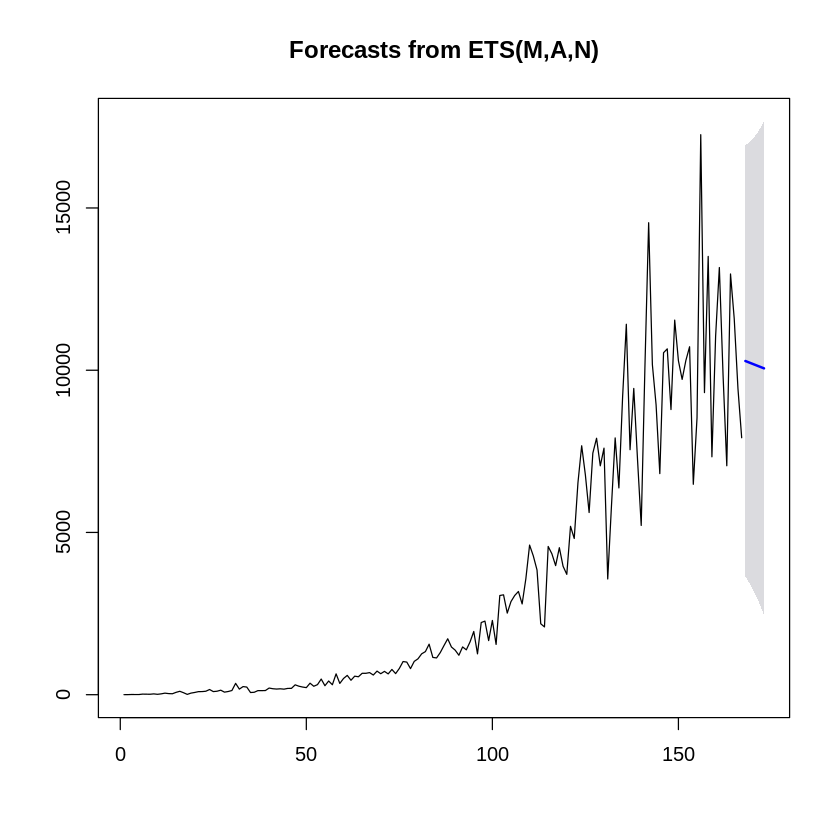

In [45]:
futurDiag <- forecast(casosFD,h=6, level=c(95))
plot(futurDiag)

#### **Fecha de notificación**

In [46]:
forecast(casosFN,6)

    Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
172      2252.0516 1446.37708 3057.726 1019.8788 3484.224
173      1994.0357 1169.27634 2818.795  732.6751 3255.396
174      1736.0199  891.85751 2580.182  444.9850 3027.055
175      1478.0040  613.24282 2342.765  155.4659 2800.542
176      1219.9881  332.47398 2107.502 -137.3476 2577.324
177       961.9723   48.52261 1875.422 -435.0284 2358.973

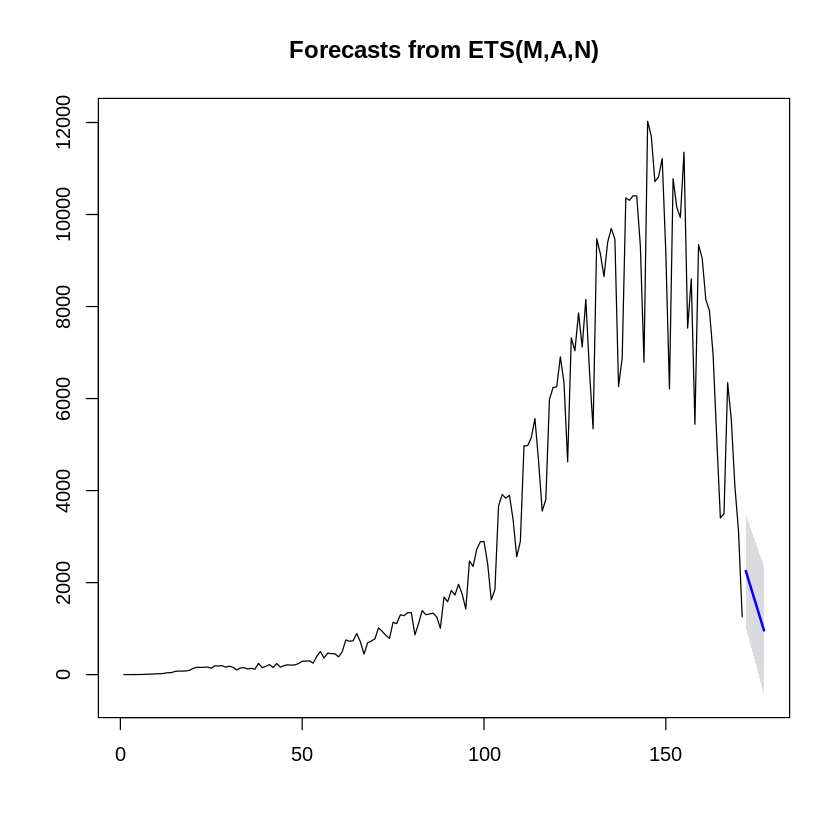

In [47]:
futurNot <- forecast(casosFN,h=6, level=c(95))
plot(futurNot)

#### **Fecha de reporte web**

In [48]:
forecast(casosFW,6)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
168       11238.57 6811.928 15665.21 4468.606 18008.53
169       11340.16 6680.560 15999.76 4213.916 18466.41
170       11441.76 6542.895 16340.62 3949.593 18933.92
171       11543.35 6398.957 16687.75 3675.678 19411.03
172       11644.95 6248.765 17041.13 3392.198 19897.70
173       11746.54 6092.326 17400.76 3099.164 20393.92

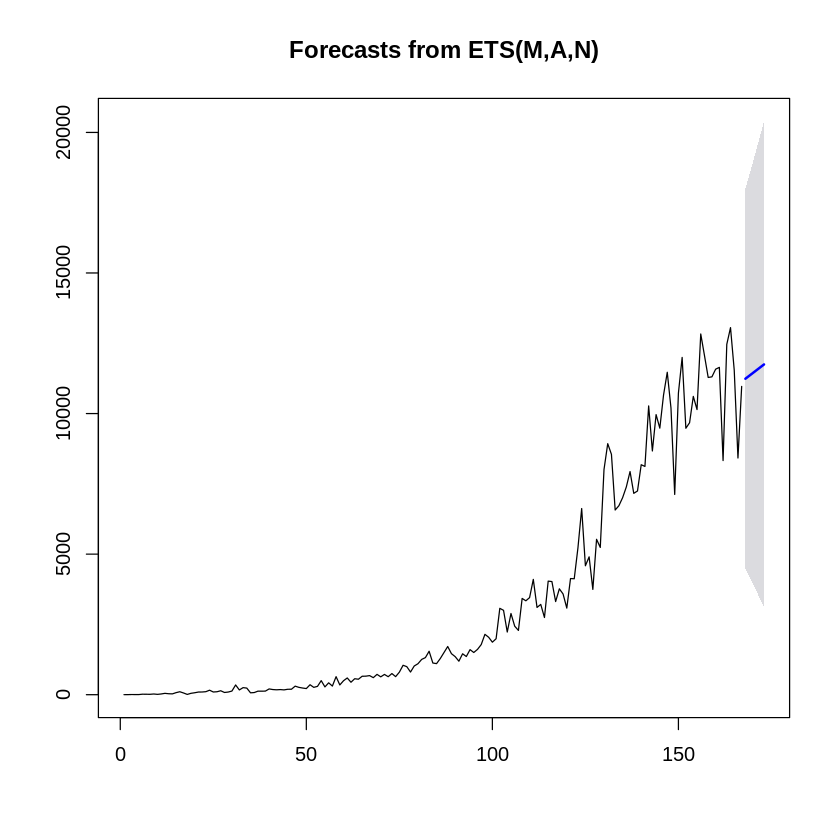

In [49]:
futurRep <- forecast(casosFW,h=6, level=c(95))
plot(futurRep)

#### Todas las regresiones parecen seguir exitosamente la tendencia de los datos